In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

#### Clustering-Divide the universities in to groups(Clusters)

In [50]:
Univ=pd.read_csv("Universities1.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [52]:
Univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [54]:
Univ.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

In [56]:
Univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [116]:
#Read all the numeric columns in to Univ1
Univ1 = Univ.iloc[:,1:]

In [118]:
Univ1

,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,89,22,13,22704,94,1
1,100,25,6,63575,81,2
2,62,59,9,25026,72,0
3,76,24,12,31510,88,1
4,83,33,13,21864,90,1
5,89,23,10,32162,95,1
6,90,30,12,31585,95,1
7,74,24,12,20126,92,1
8,91,14,11,39525,97,1
9,75,44,7,58691,87,2


In [120]:
cols=Univ1.columns

In [122]:
#Standardisation function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = pd.DataFrame(scaler.fit_transform(Univ1),columns=cols)
scaled_Univ_df

,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,0.657519,-0.889867,0.070260,-0.331413,0.820303,0.294884
1,1.235212,-0.734657,-1.686251,2.560381,-0.644524,2.137908
2,-0.760454,1.024382,-0.933460,-0.167121,-1.658634,-1.548141
3,-0.025208,-0.786394,-0.180670,0.291649,0.144229,0.294884
4,0.342414,-0.320766,0.070260,-0.390846,0.369587,0.294884
5,0.657519,-0.838130,-0.682530,0.337780,0.932982,0.294884
6,0.710037,-0.475975,-0.180670,0.296955,0.932982,0.294884
7,-0.130243,-0.786394,-0.180670,-0.513817,0.594945,0.294884
8,0.762555,-1.303758,-0.431600,0.858743,1.158339,0.294884
9,-0.077726,0.248335,-1.435321,2.214818,0.031550,2.137908


In [124]:
#Build 3 Cluster using KMeans Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3,random_state=0) # Specify 3 clusters
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=0)

In [126]:
#Print the Cluster labels
clusters_new.labels_

array([1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1])

In [128]:
set(clusters_new.labels_)

{0, 1, 2}

In [130]:
#Assign clusters to the Univ data set
Univ['clusterid_new'] = clusters_new.labels_

In [132]:
Univ

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,1310,89,22,13,22704,94,1
1,1415,100,25,6,63575,81,2
2,1260,62,59,9,25026,72,0
3,1310,76,24,12,31510,88,1
4,1280,83,33,13,21864,90,1
5,1340,89,23,10,32162,95,1
6,1315,90,30,12,31585,95,1
7,1255,74,24,12,20126,92,1
8,1400,91,14,11,39525,97,1
9,1305,75,44,7,58691,87,2


In [134]:
Univ[Univ['clusterid_new']==1]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,1310,89,22,13,22704,94,1
3,1310,76,24,12,31510,88,1
4,1280,83,33,13,21864,90,1
5,1340,89,23,10,32162,95,1
6,1315,90,30,12,31585,95,1
7,1255,74,24,12,20126,92,1
8,1400,91,14,11,39525,97,1
10,1380,94,30,10,34870,91,1
11,1260,85,39,11,28052,89,1
12,1255,81,42,13,15122,94,1


In [136]:
#use groupby to find aggregated(mean)values in each cluster
Univ.iloc[:,1:].groupby('clusterid_new').mean()

,Top10,Accept,SFRatio,Expenses,GradRate
clusterid_new,,,,,
0,47.000000,67.833333,17.000000,13384.666667,74.000000
1,85.588235,29.647059,11.941176,28360.352941,91.529412
2,87.500000,34.500000,6.500000,61133.000000,84.000000


#### Observations:
* Cluster 2 appears to be top rated universites cluster as the cut off score,Top 10,SFRatio parameter mean values are high.
* Cluster1 appears to occupy the middle rated universities.
* cluster 0 comes as the lower level rated universities.

In [138]:
Univ[Univ['clusterid_new']==0]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
2,1260,62,59,9,25026,72,0
13,1081,38,54,18,10185,80,0
15,1005,28,90,19,9066,69,0
17,1075,49,67,25,8704,67,0
20,1180,65,68,16,15470,85,0
23,1085,40,69,15,11857,71,0


#### Finding optimal k value using elbow plot

[150.0, 61.75570695438912, 41.30079381252559, 32.21026124859666, 24.30106041794524, 21.210287763143405, 18.302079881294567, 17.042740600571484, 11.42291055893139, 10.0855057326822, 8.463316203386185, 6.594478273518634, 4.9297099792579235, 4.107040404791172, 3.4769274078699755, 2.612931346904762, 1.636468772075442, 1.261935332440564, 0.9920901411474125]


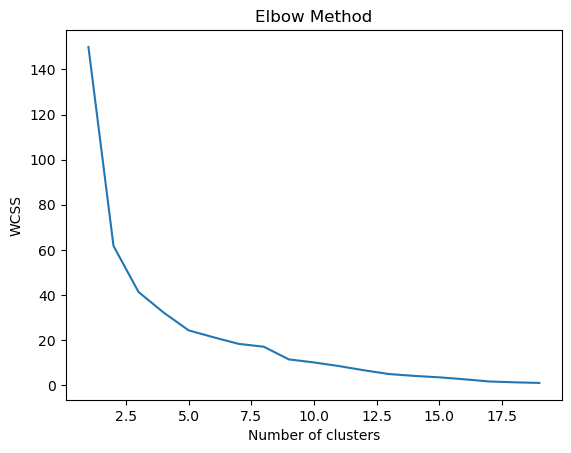

In [153]:
wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(scaled_Univ_df)
  wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()